In [1]:
import pandas as pd

In [2]:
iris = pd.read_csv('../data/iris.csv')

In [3]:
iris.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# iris.info --- gives us reference for dtypes, no of int, cat
# iris.describe --- statistical inferences

In [8]:
round(iris.describe(),2)

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [10]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [13]:
# change the column names - strings - we use string manupulation on these column names

iris.columns = iris.columns.str.replace(pat='_', repl='-')

In [14]:
iris.head()

,sepal-length-(cm),sepal-width-(cm),petal-length-(cm),petal-width-(cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### save the data using pandas

In [16]:


iris.to_csv('../data/delete.csv', index = False)


In [17]:
## manupulation of the dates

df_datetime = pd.read_csv('../data/timeseries.csv')

In [18]:
df_datetime.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2022-01-17 18:45:09,2022-01-17 18:48:15,1.0,0.55,1.0,N,237,141,1,4.5,0.0,0.5,1.95,0.0,0.3,9.75,2.5,0.00
1,1,2022-01-20 20:15:33,2022-01-20 20:27:54,NaN,2.20,NaN,NaN,161,113,0,10.5,0.5,0.5,2.15,0.0,0.3,16.45,NaN,NaN
2,1,2022-01-28 19:09:40,2022-01-28 19:19:02,3.0,1.50,1.0,N,236,162,1,9.0,3.5,0.5,2.65,0.0,0.3,15.95,2.5,0.00
3,1,2022-01-17 09:34:17,2022-01-17 09:44:04,1.0,1.20,1.0,N,170,186,1,8.0,2.5,0.5,2.26,0.0,0.3,13.56,2.5,0.00
4,2,2022-01-08 02:18:23,2022-01-08 02:55:13,1.0,22.45,1.0,N,132,97,2,61.0,0.5,0.5,0.00,0.0,0.3,63.55,0.0,1.25


In [26]:
df_datetime['tpep_dropoff_datetime'] = pd.to_datetime(df_datetime['tpep_dropoff_datetime'])
df_datetime['tpep_pickup_datetime'] = pd.to_datetime(df_datetime['tpep_pickup_datetime'])

In [27]:
df_datetime.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [28]:
df_datetime['trip_duration'] = df_datetime['trip_duration'] = df_datetime['tpep_dropoff_datetime'] - df_datetime['tpep_pickup_datetime']

In [32]:
df_datetime['trip_duration'].head()

0   0 days 00:03:06
1   0 days 00:12:21
2   0 days 00:09:22
3   0 days 00:09:47
4   0 days 00:36:50
Name: trip_duration, dtype: timedelta64[ns]

In [33]:
df_datetime['trip_duration'] = df_datetime['trip_duration'].dt.total_seconds()

In [34]:
df_datetime['trip_duration'].head()

0     186.0
1     741.0
2     562.0
3     587.0
4    2210.0
Name: trip_duration, dtype: float64

#### more date manupulations

In [60]:
df_datetime_1 = pd.read_csv('../data/time_based.csv')

In [61]:
df_datetime_1.head()

,timestampUTC,measured_kW
0,2014-09-07 00:00:00,194.88
1,2014-09-07 00:15:00,190.56
2,2014-09-07 00:30:00,193.44
3,2014-09-07 00:45:00,192.96
4,2014-09-07 01:00:00,190.56


In [62]:
df_datetime_1.shape

(103488, 2)

In [63]:
df_datetime_1.isnull().sum()

timestampUTC    0
measured_kW     0
dtype: int64

In [65]:
df_datetime_1.dtypes

timestampUTC     object
measured_kW     float64
dtype: object

In [66]:
df_datetime_1['timestampUTC'] = pd.to_datetime(df_datetime_1['timestampUTC'])

In [67]:
df_datetime_1.dtypes

timestampUTC    datetime64[ns]
measured_kW            float64
dtype: object

In [68]:
df_datetime_1['timestampUTC'].min(), df_datetime_1['timestampUTC'].max()

(Timestamp('2014-09-07 00:00:00'), Timestamp('2017-08-19 23:45:00'))

In [19]:
# reading directly from github/ url
url = 'https://raw.githubusercontent.com/venky14/Machine-Learning-with-Iris-Dataset/master/Iris.csv'

sample = pd.read_csv(url)

In [20]:
sample.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
# reading files using parquet pandas

sample_parquet = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet')

#### sorting of values in a dataframe

In [39]:
iris.sort_values(by=['sepal-width-(cm)'], ascending=False)

# default ascending is True

,sepal-length-(cm),sepal-width-(cm),petal-length-(cm),petal-width-(cm),species
15,5.7,4.4,1.5,0.4,setosa
33,5.5,4.2,1.4,0.2,setosa
32,5.2,4.1,1.5,0.1,setosa
14,5.8,4.0,1.2,0.2,setosa
16,5.4,3.9,1.3,0.4,setosa
...,...,...,...,...,...
87,6.3,2.3,4.4,1.3,versicolor
62,6.0,2.2,4.0,1.0,versicolor
68,6.2,2.2,4.5,1.5,versicolor
119,6.0,2.2,5.0,1.5,virginica


In [40]:
iris.sort_index(ascending=False)

,sepal-length-(cm),sepal-width-(cm),petal-length-(cm),petal-width-(cm),species
149,5.9,3.0,5.1,1.8,virginica
148,6.2,3.4,5.4,2.3,virginica
147,6.5,3.0,5.2,2.0,virginica
146,6.3,2.5,5.0,1.9,virginica
145,6.7,3.0,5.2,2.3,virginica
...,...,...,...,...,...
4,5.0,3.6,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [42]:
iris.corr(numeric_only = True)

,sepal-length-(cm),sepal-width-(cm),petal-length-(cm),petal-width-(cm)
sepal-length-(cm),1.000000,-0.117570,0.871754,0.817941
sepal-width-(cm),-0.117570,1.000000,-0.428440,-0.366126
petal-length-(cm),0.871754,-0.428440,1.000000,0.962865
petal-width-(cm),0.817941,-0.366126,0.962865,1.000000


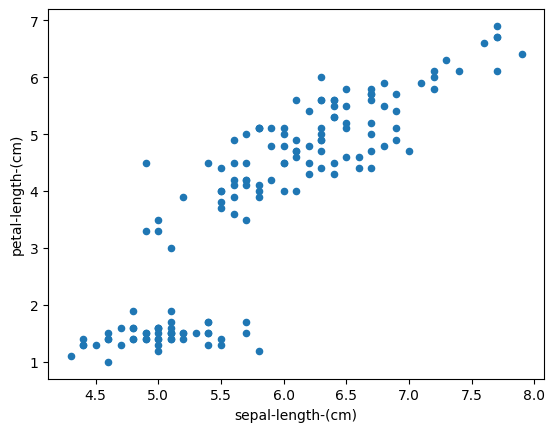

In [47]:
# correlation lies between (-1,1)

import matplotlib.pyplot as plt

%matplotlib inline

iris.plot(kind= 'scatter', x = 'sepal-length-(cm)', y = 'petal-length-(cm)');

#### aggregate functions in pandas

In [48]:
iris.describe()

,sepal-length-(cm),sepal-width-(cm),petal-length-(cm),petal-width-(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [49]:
iris['sepal-length-(cm)'].min(), iris['sepal-length-(cm)'].max(), iris['sepal-length-(cm)'].mean()

(4.3, 7.9, 5.843333333333334)

In [50]:
iris.groupby('species').mean()

,sepal-length-(cm),sepal-width-(cm),petal-length-(cm),petal-width-(cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [51]:
iris.groupby('species')['sepal-length-(cm)'].mean()

species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal-length-(cm), dtype: float64

In [53]:
import numpy as np

In [54]:
iris['sepal-length-(cm)'].agg([min, max, np.mean])

min     4.300000
max     7.900000
mean    5.843333
Name: sepal-length-(cm), dtype: float64

In [57]:
iris[['sepal-length-(cm)', 'petal-width-(cm)']].aggregate([min, max, np.mean])

,sepal-length-(cm),petal-width-(cm)
min,4.300000,0.100000
max,7.900000,2.500000
mean,5.843333,1.199333


In [59]:
iris.groupby('species').aggregate([min, max, np.mean])

sepal-length-(cm)             sepal-width-(cm)              \
                         min  max   mean              min  max   mean   
species                                                                 
setosa                   4.3  5.8  5.006              2.3  4.4  3.428   
versicolor               4.9  7.0  5.936              2.0  3.4  2.770   
virginica                4.9  7.9  6.588              2.2  3.8  2.974   

           petal-length-(cm)             petal-width-(cm)              
                         min  max   mean              min  max   mean  
species                                                                
setosa                   1.0  1.9  1.462              0.1  0.6  0.246  
versicolor               3.0  5.1  4.260              1.0  1.8  1.326  
virginica                4.5  6.9  5.552              1.4  2.5  2.026